<a href="https://colab.research.google.com/github/mounika281005/Adobe_GenSolve_Hackathon/blob/main/adobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curve 1, Polyline 1: Number of points differs (419 vs 12)
Curve 2, Polyline 1: Number of points differs (550 vs 432)
Curve 3, Polyline 1: Number of points differs (423 vs 5)


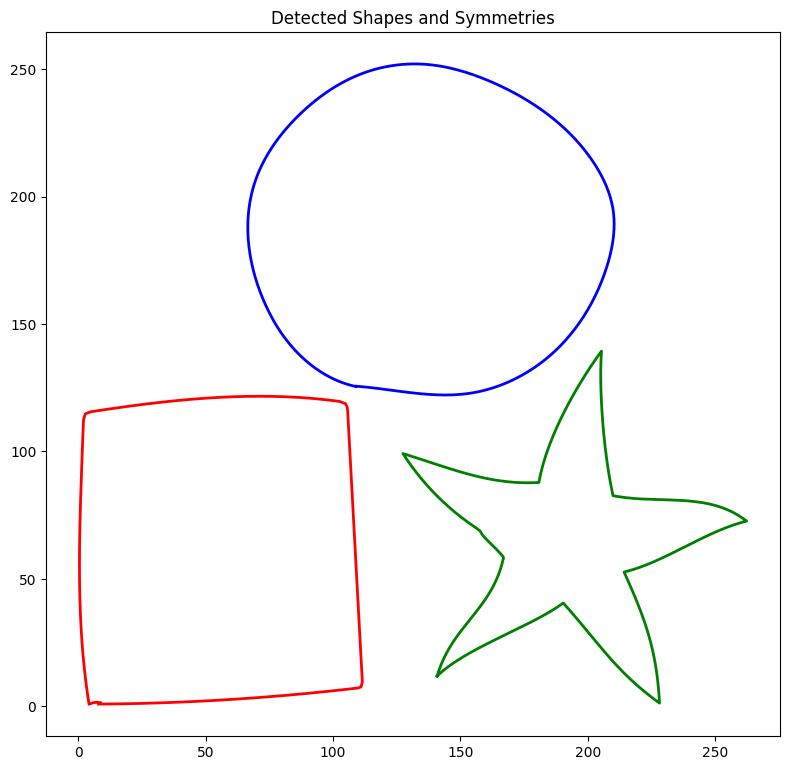

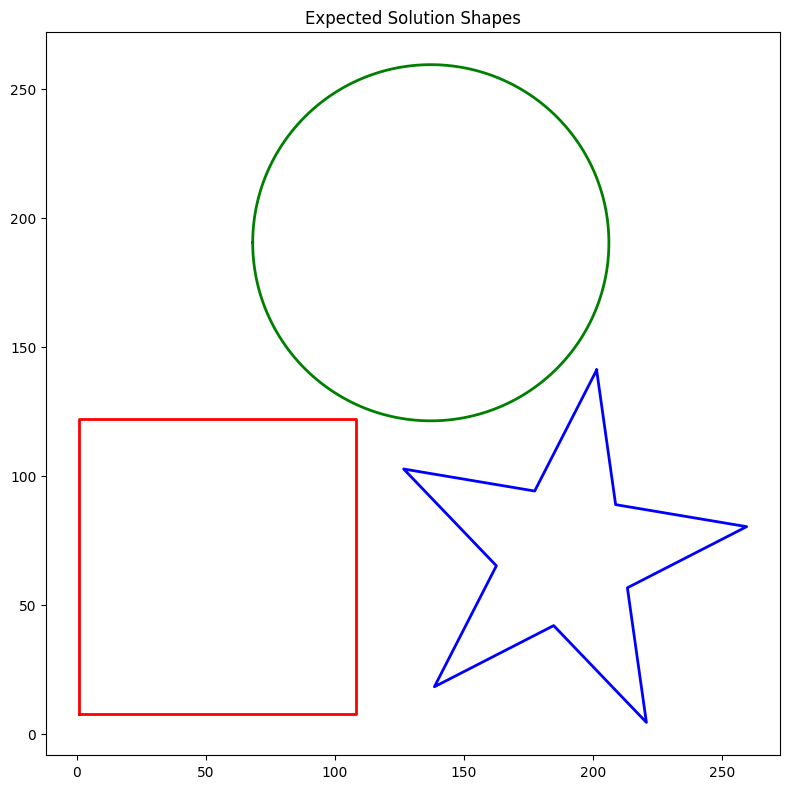

Curve 1, Polyline 1: Number of points differs (94 vs 166)
Curve 2, Polyline 1: Number of points differs (166 vs 205)
Curve 3, Polyline 1: Number of points differs (171 vs 513)
Curve 4, Polyline 1: Number of points differs (166 vs 5)


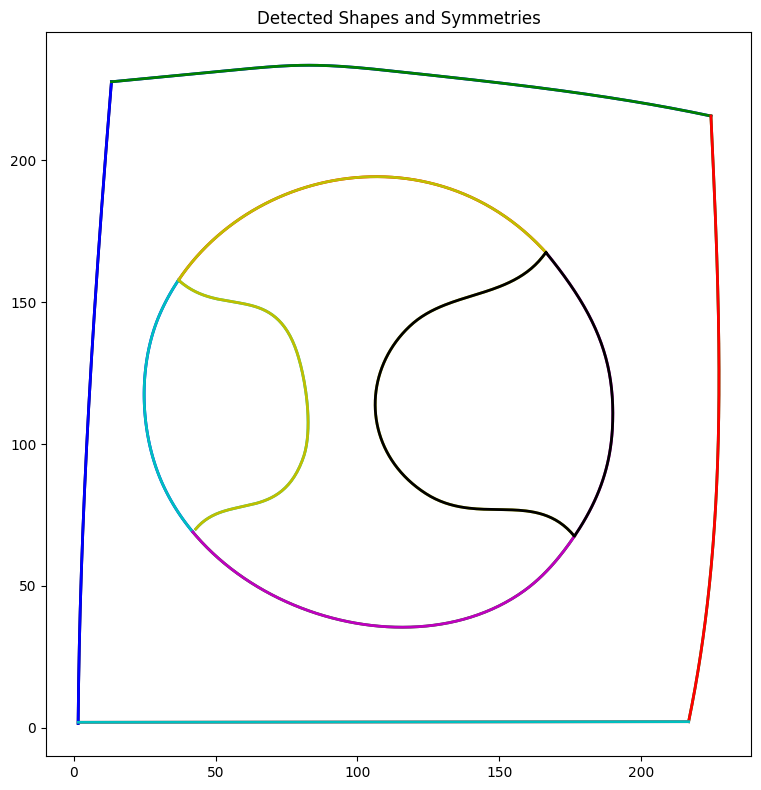

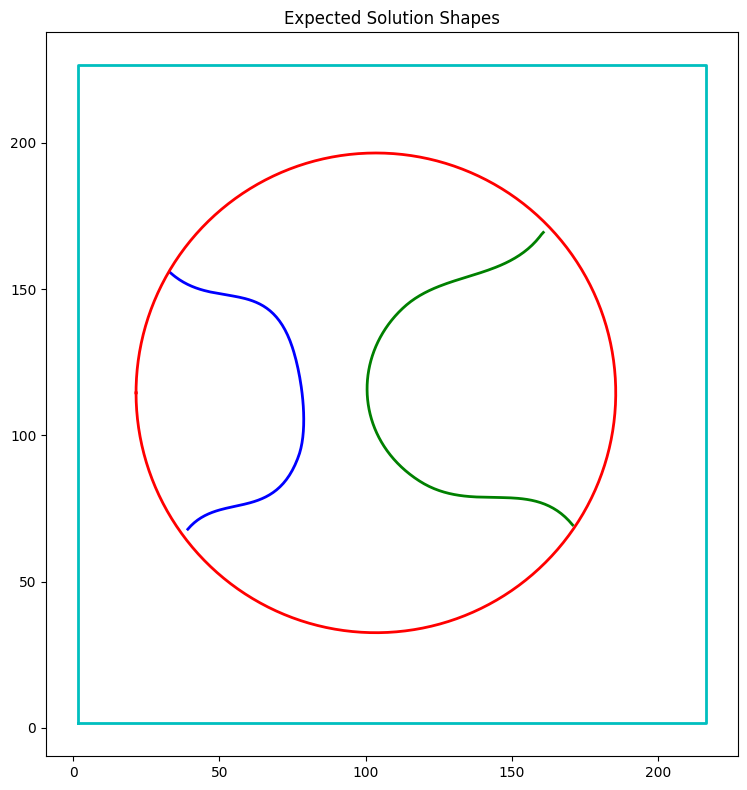

Curve 1, Polyline 1: Number of points differs (374 vs 359)
Curve 2, Polyline 1: Does NOT Match Expected Output
Curve 2, Polyline 2: Does NOT Match Expected Output


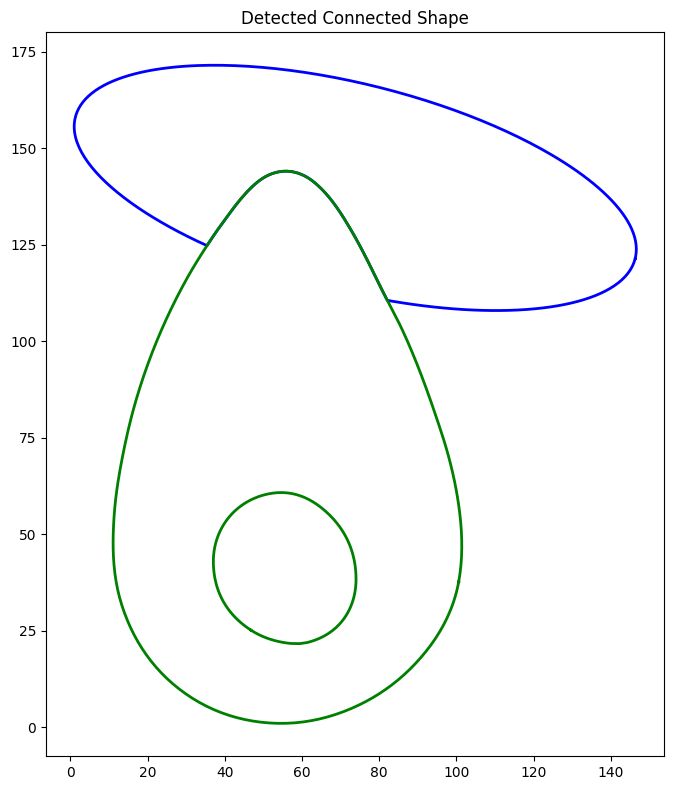

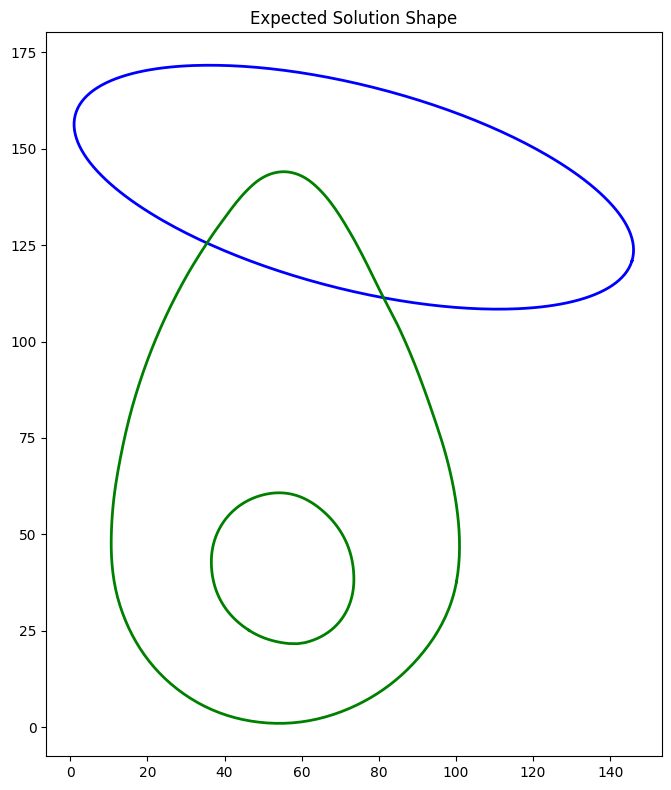

Curve 1, Polyline 1: Number of points differs (58 vs 547)
Curve 2, Polyline 1: Number of points differs (67 vs 586)


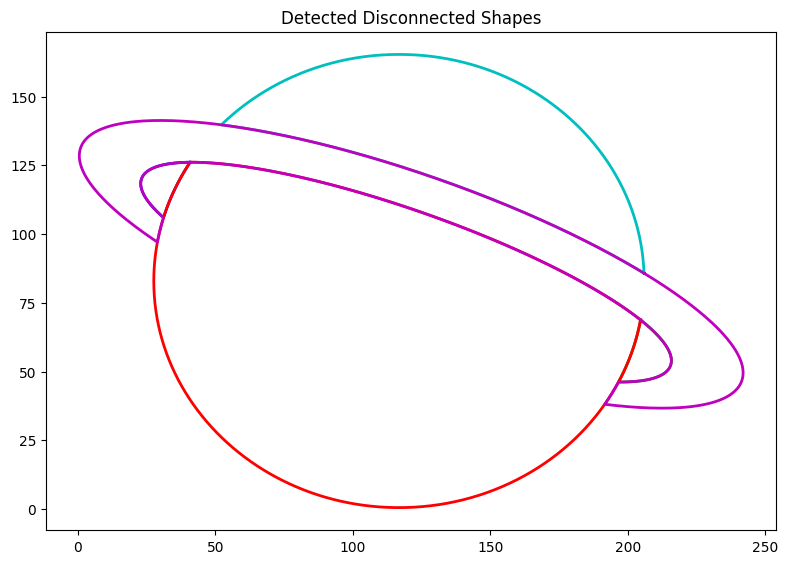

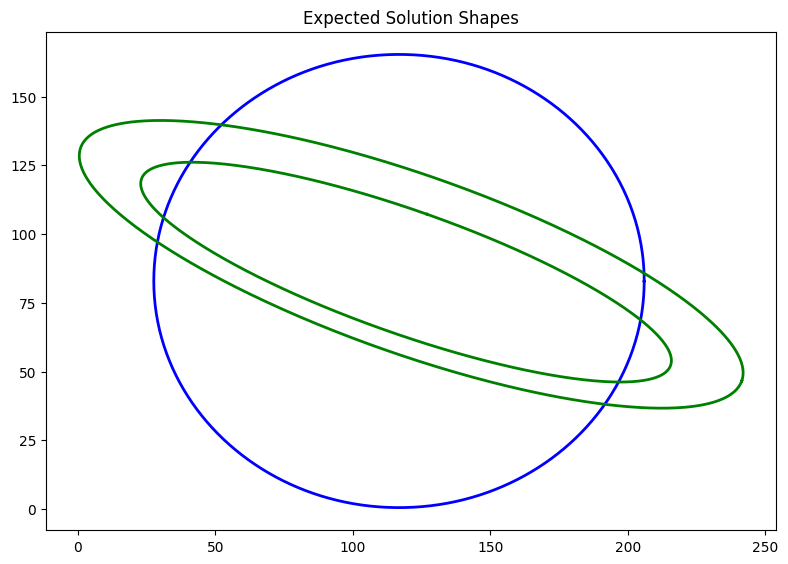

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def combine_paths(*csv_paths):
    combined_XYs = []
    for csv_path in csv_paths:
        combined_XYs.extend(read_csv(csv_path))
    return combined_XYs

def detect_shapes_and_symmetry(path_XYs):
    # Placeholder for shape and symmetry detection logic
    detected_shapes = path_XYs  # Assume we just return what we found for now
    return detected_shapes

def detect_connected_shape(path_XYs):
    # Placeholder for occlusion handling logic for connected shapes
    connected_shape = path_XYs  # Assume we just return what we found for now
    return connected_shape

def detect_disconnected_shape(path_XYs):
    # Placeholder for occlusion handling logic for disconnected shapes
    disconnected_shapes = path_XYs  # Assume we just return what we found for now
    return disconnected_shapes

def plot(path_XYs, title="Plot"):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(path_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

def compare_curves(input_XYs, expected_XYs, tolerance=1e-3):
    for i, (input_curve, expected_curve) in enumerate(zip(input_XYs, expected_XYs)):
        for j, (input_polyline, expected_polyline) in enumerate(zip(input_curve, expected_curve)):
            if len(input_polyline) != len(expected_polyline):
                print(f"Curve {i+1}, Polyline {j+1}: Number of points differs ({len(input_polyline)} vs {len(expected_polyline)})")
                continue
            if np.allclose(input_polyline, expected_polyline, atol=tolerance):
                print(f"Curve {i+1}, Polyline {j+1}: Matches Expected Output")
            else:
                print(f"Curve {i+1}, Polyline {j+1}: Does NOT Match Expected Output")

# Example 1: Single file input and output comparison
input_csv_file_path = r"/content/isolated.csv"
expected_output_csv_file_path = r"/content/isolated_sol.csv"

input_path_XYs = read_csv(input_csv_file_path)
expected_path_XYs = read_csv(expected_output_csv_file_path)

detected_shapes = detect_shapes_and_symmetry(input_path_XYs)
compare_curves(detected_shapes, expected_path_XYs)

plot(detected_shapes, title="Detected Shapes and Symmetries")
plot(expected_path_XYs, title="Expected Solution Shapes")

# Example 2: Combining multiple CSV files and comparing with expected output
input_csv_file_paths = [
    r"/content/frag0.csv",
    r"/content/frag1.csv"
]
combined_path_XYs = combine_paths(*input_csv_file_paths)
expected_output_csv_file_path = r"/content/frag01_sol.csv"
expected_path_XYs = read_csv(expected_output_csv_file_path)

detected_shapes = detect_shapes_and_symmetry(combined_path_XYs)
compare_curves(detected_shapes, expected_path_XYs)

plot(detected_shapes, title="Detected Shapes and Symmetries")
plot(expected_path_XYs, title="Expected Solution Shapes")

# Example 3: Handling occlusions for connected shapes
input_csv_file_path = r"/content/occlusion1.csv"
expected_output_csv_file_path = r"/content/occlusion1_sol.csv"

input_path_XYs = read_csv(input_csv_file_path)
expected_path_XYs = read_csv(expected_output_csv_file_path)

detected_connected_shape = detect_connected_shape(input_path_XYs)
compare_curves(detected_connected_shape, expected_path_XYs)

plot(detected_connected_shape, title="Detected Connected Shape")
plot(expected_path_XYs, title="Expected Solution Shape")

# Example 4: Handling occlusions for disconnected shapes
input_csv_file_path = r"/content/occlusion2.csv"
expected_output_csv_file_path = r"/content/occlusion2_sol.csv"

input_path_XYs = read_csv(input_csv_file_path)
expected_path_XYs = read_csv(expected_output_csv_file_path)

detected_disconnected_shapes = detect_disconnected_shape(input_path_XYs)
compare_curves(detected_disconnected_shapes, expected_path_XYs)

plot(detected_disconnected_shapes, title="Detected Disconnected Shapes")
plot(expected_path_XYs, title="Expected Solution Shapes")


Vertical Symmetry: True
Horizontal Symmetry: True
Diagonal Symmetry: True


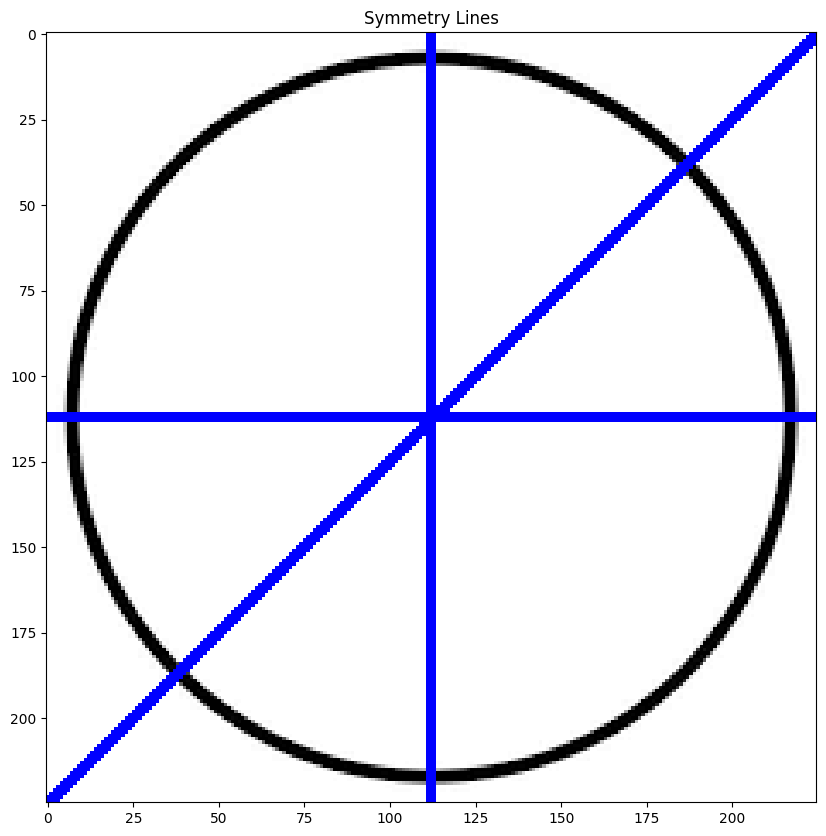

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def check_symmetry(contour, axis):
    # Reshape contour to be a 2D array
    contour = contour.reshape(-1, 2)  # Reshape to (number of points, 2)

    # Reflect the contour across the given axis
    contour_flipped = np.copy(contour)
    if axis == 'vertical':
        contour_flipped[:, 0] = -contour_flipped[:, 0] + contour[:, 0].max()
    elif axis == 'horizontal':
        contour_flipped[:, 1] = -contour_flipped[:, 1] + contour[:, 1].max()
    elif axis == 'diagonal':
        contour_flipped = np.array([contour[:, 1], contour[:, 0]]).T

    # Calculate the pairwise distances between the original and flipped contours
    distances = pairwise_distances(contour, contour_flipped)
    min_dist = np.min(distances, axis=1)

    # If the distances are small enough, the shape is symmetric
    return np.all(min_dist < 1e-2)

def draw_symmetry_line(image, axis):
    h, w = image.shape[:2]
    if axis == 'vertical':
        cv2.line(image, (w//2, 0), (w//2, h), (255, 0, 0), 2)
    elif axis == 'horizontal':
        cv2.line(image, (0, h//2), (w, h//2), (255, 0, 0), 2)
    elif axis == 'diagonal':
        cv2.line(image, (0, h), (w, 0), (255, 0, 0), 2)

# Load the image and convert to grayscale
image = cv2.imread('circle.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check for symmetry
axes = ['vertical', 'horizontal', 'diagonal']
symmetries = {axis: check_symmetry(contours[0], axis) for axis in axes}

# Draw lines of symmetry on a colored image
image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for axis in axes:
    if symmetries[axis]:
        draw_symmetry_line(image_colored, axis)

# Print the symmetry results
for axis, is_symmetric in symmetries.items():
    print(f"{axis.capitalize()} Symmetry: {is_symmetric}")

# Display the image with symmetry lines
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_colored, cv2.COLOR_BGR2RGB))
plt.title("Symmetry Lines")
plt.show()


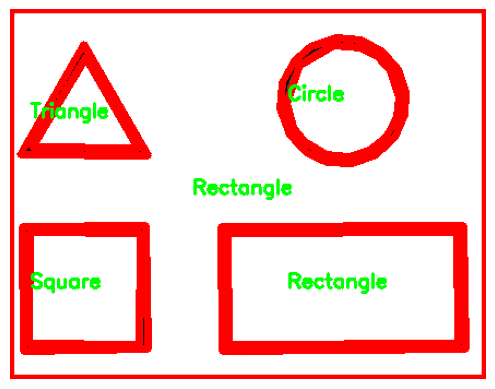

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
img = cv2.imread("/content/shapes.png")

# Convert the image to a grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add threshold to create a binary image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours to detect the edges
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour to detect shapes
for contour in contours:
    # Approximate the contour with a polygon
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

    # Draw the contour on the original image
    cv2.drawContours(img, [approx], 0, (0, 0, 255), 5)

    # Find the center point of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0:
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])

        # Determine the shape based on the number of vertices
        num_vertices = len(approx)
        if num_vertices == 3:
            shape_name = "Triangle"
        elif num_vertices == 4:
            aspect_ratio = float(cv2.boundingRect(approx)[2]) / cv2.boundingRect(approx)[3]
            if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
                shape_name = "Square"
            else:
                shape_name = "Rectangle"
        elif num_vertices == 5:
            shape_name = "Pentagon"
        elif num_vertices == 6:
            shape_name = "Hexagon"
        elif num_vertices > 6 and num_vertices % 2 == 1:
            # Check for star shape by analyzing the contour convexity
            if cv2.isContourConvex(approx) == False:
                shape_name = "Star"
            else:
                shape_name = "Polygon"
        else:
            shape_name = "Circle"

        # Put the shape name at the center of the shape
        cv2.putText(img, shape_name, (x - 50, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the final image with shapes detected
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


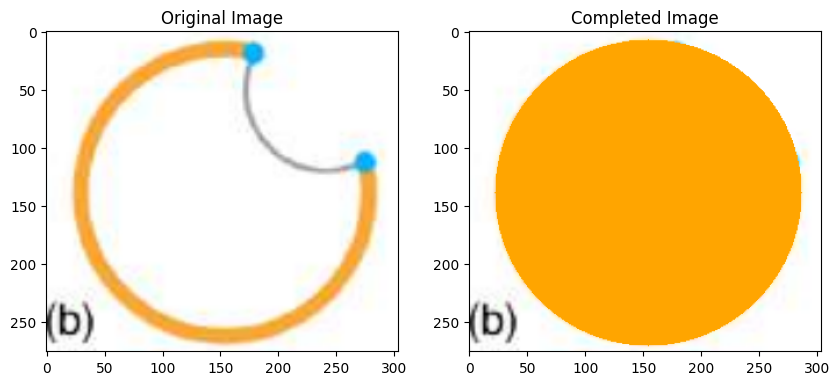

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_contours(image):
    """Detect contours in the image."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def complete_circle(image, contour):
    """Approximate and complete the circle."""
    # Fit a minimum enclosing circle to the contour
    center, radius = cv2.minEnclosingCircle(contour)
    center = (int(center[0]), int(center[1]))
    radius = int(radius)

    # Draw the complete circle on the original image
    completed_image = image.copy()
    cv2.circle(completed_image, center, radius, (0, 165, 255), -1)  # Use the color of the orange circle

    return completed_image

# Load the image
image_path = "/content/gfg2.png"
image = cv2.imread(image_path)

# Detect contours
contours = detect_contours(image)

# Assume the largest contour is the one we want to complete
largest_contour = max(contours, key=cv2.contourArea)

# Complete the circle
completed_image = complete_circle(image, largest_contour)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(completed_image, cv2.COLOR_BGR2RGB))
plt.title("Completed Image")
plt.show()